In machine learning, to improve something you often need to be able to measure it. TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

This quickstart will show how to quickly get started with TensorBoard. The remaining guides in this website provide more details on specific capabilities, many of which are not included here.

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data() # load data set

In [4]:
len(xtrain) # number of train data

60000

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtrain[0].shape # image size according to pixel

(28, 28)

In [7]:
xtrain[0]# getting each pixel's value between 0-255 of zero index image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 720x576 with 0 Axes>

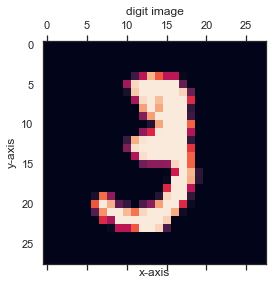

In [8]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.matshow(xtrain[10]) # showing an image
plt.title('digit image')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [9]:
ytrain[1]

0

In [10]:
xtrain[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [11]:
xtrain=xtrain/255 # convert all pixels values between 0 to 1 
xtest=xtest/255

# Flatten the image
flatten the image/reshape into 28*28 to 784

In [12]:
xtrain=xtrain.reshape(-1,784) # converting 2D to 1D
xtest=xtest.reshape(-1,784)

In [13]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28) # converting 2D to 1D
xtrain_flattened.shape

(60000, 784)

In [14]:
xtest_flattened=xtest.reshape(len(xtest),28*28) # converting 2D to 1D
xtest_flattened.shape

(10000, 784)

In [15]:
xtrain_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

    tf.keras.callbacks.TensorBoard
When training with Keras's Model.fit(), adding the tf.keras.callbacks.TensorBoard callback ensures that logs are created and stored. Additionally, enable histogram computation every epoch with histogram_freq=1 (this is off by default)

    log_dir
log_dir	the path of the directory where to save the log files to be parsed by TensorBoard. e.g. log_dir = os.path.join(working_dir, 'logs') This directory should not be reused by any other callbacks.

log_dir='/Graph' -->   "/Graph" makes a directory in the root directory, while "./Graph" makes one in the working directory

    histogram_freq
frequency (in epochs) at which to compute weight histograms for the layers of the model. If set to 0, histograms won't be computed. Validation data (or split) must be specified for histogram visualizations.

"histogram_freq=1: frequency (in epochs) at which to compute activation histograms for the layers of the model. If set to 0, histograms won't be computed."

In [16]:
model=keras.Sequential([ # loding the model
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # here 10 = output shape/nouron

])

Scaling is a technique which increasing the accuracy and dicreasing loss of model

In [20]:
model.compile(                     # evaluating accuracy of train dataset
    optimizer='SGD',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1) # This line creates a Callback Tensorboard object, you should capture that object and give it to the fit function of your model.

model.fit(xtrain_flattened, ytrain, epochs=5,callbacks=[tb_callback]) # train the model | epoche=5 number of iteration

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9295
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2542 - accuracy: 0.9298
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2539 - accuracy: 0.9296
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2534 - accuracy: 0.9298
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2531 - accuracy: 0.9297


# Launching TensorBoard within notebook

In [19]:
# %load_ext tensorboard                           # Load the TensorBoard notebook extension
# %tensorboard --logdir logs/fit                  # Start TensorBoard through the command line or within a notebook experience. The two interfaces are generally the same. In notebooks, use the %tensorboard line magic. On the command line, run the same command without "%".

In [ ]:

#%load_ext tensorboard # Load the TensorBoard notebook extension

In [ ]:
# Clear any logs from previous runs
#!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.
